In [97]:
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [98]:
data=load_breast_cancer()
x=data.data
y=data.target
x.shape

(569, 30)

In [99]:
print(data.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

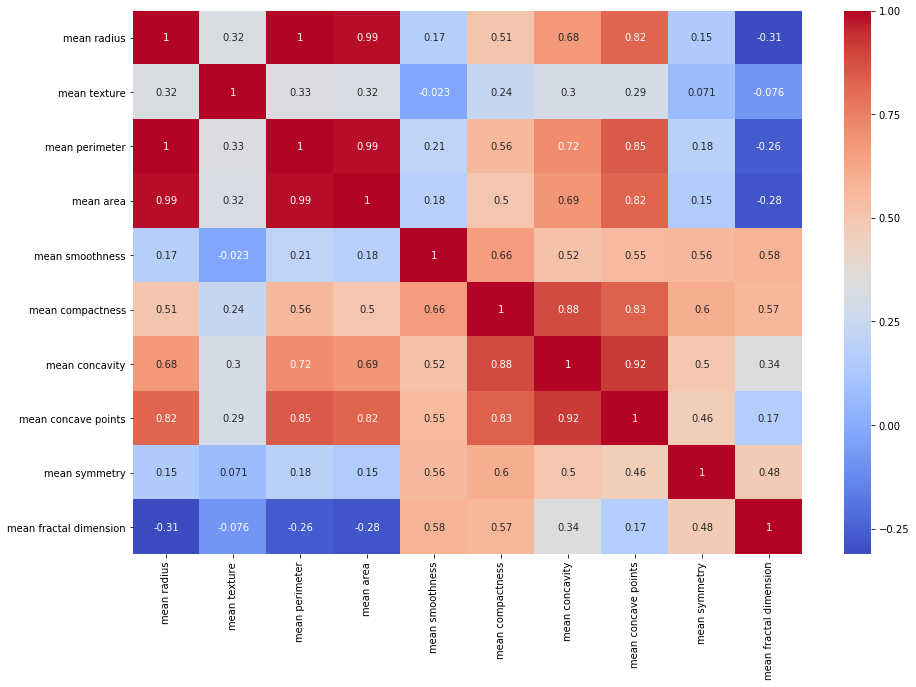

In [100]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.DataFrame(data.data,columns=data.feature_names)
plt.figure(figsize=(15,10))
sns.heatmap(df.iloc[:,:10].corr(),annot=True,cmap='coolwarm')

In [101]:
from sklearn.preprocessing import StandardScaler
X_std=StandardScaler().fit_transform(df)

In [102]:
from sklearn.decomposition import PCA
pca=PCA()

In [103]:
after_pca=pca.fit_transform(X_std)

/Users/shadow/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


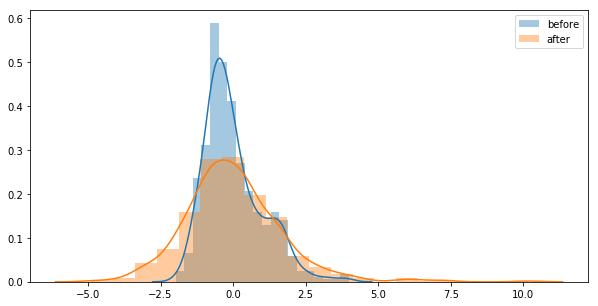

In [104]:
plt.figure(figsize=(10,5))
sns.distplot(X_std[:,2],bins=20,label='before')
sns.distplot(after_pca[:,2],bins=20,label='after')
plt.legend()

In [105]:
pca.explained_variance_ratio_[:10].sum()

0.9515688143366665

In [106]:
pca.inverse_transform(after_pca),X_std

(array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
          2.75062224,  1.93701461],
        [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
         -0.24388967,  0.28118999],
        [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
          1.152255  ,  0.20139121],
        ...,
        [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
         -1.10454895, -0.31840916],
        [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
          1.91908301,  2.21963528],
        [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
         -0.04813821, -0.75120669]]),
 array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
          2.75062224,  1.93701461],
        [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
         -0.24388967,  0.28118999],
        [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
          1.152255  ,  0.20139121],
        ...,
        [ 0.70228425,  2.0455738 ,  0.67267578, ...,  

In [107]:
pca.explained_variance_ratio_[0],((pca.singular_values_)**2)[0]/sum((pca.singular_values_)**2)

(0.44272025607526305, 0.44272025607526316)

In [111]:
np.cumsum(pca.explained_variance_ratio_)

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])